In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/bills.csv")
# Takes ~30 seconds to run

In [24]:
columns = df.columns.tolist()


specific_columns = df[['bill_total_billed', 'bill_total_net', 'payment_amount']]
print(columns)

['bill_paid_at_local', 'bill_total_billed', 'bill_total_discount_item_level', 'bill_total_gratuity', 'bill_total_net', 'bill_total_tax', 'bill_total_voided', 'bill_uuid', 'business_date', 'order_duration_seconds', 'order_seated_at_local', 'order_closed_at_local', 'order_take_out_type_label', 'order_uuid', 'payment_amount', 'payment_count', 'payment_total_tip', 'sales_revenue_with_tax', 'venue_xref_id', 'waiter_uuid']


In [ ]:
def time_format(data):
    bill_day = []
    bill_hour = []
    bill_minute = []
    bill_second = []
    for i in data['bill_paid_at_local']:
        day = i.split(" ")[1]
        bill_hour.append(int(day.split(":")[0]))
        bill_minute.append(int(day.split(":")[1]))
        bill_second.append(int(day.split(":")[2]))

    data['bill_hour'] = bill_hour
    data['bill_minute'] = bill_minute
    data['bill_second'] = bill_second
    return data

new = time_format(df)
# print(new.head())
print(len(df))

    bill_paid_at_local  bill_total_billed  bill_total_discount_item_level  \
0  2024-07-01 09:17:01              21.81                             0.0   
1  2024-07-01 13:37:00              48.95                             0.0   
2  2024-07-01 11:19:32              26.94                             0.0   
3  2024-07-01 15:05:59               3.96                             0.0   
4  2024-07-01 12:41:00               3.36                             0.0   

   bill_total_gratuity  bill_total_net  bill_total_tax  bill_total_voided  \
0                  0.0           19.30            2.51                0.0   
1                  0.0           43.32            5.63                0.0   
2                  0.0           23.84            3.10                0.0   
3                  0.0            3.77            0.19                0.0   
4                  0.0            3.20            0.16                0.0   

                                           bill_uuid business_date  \
0  2

# Histogram of Bills by the Hour

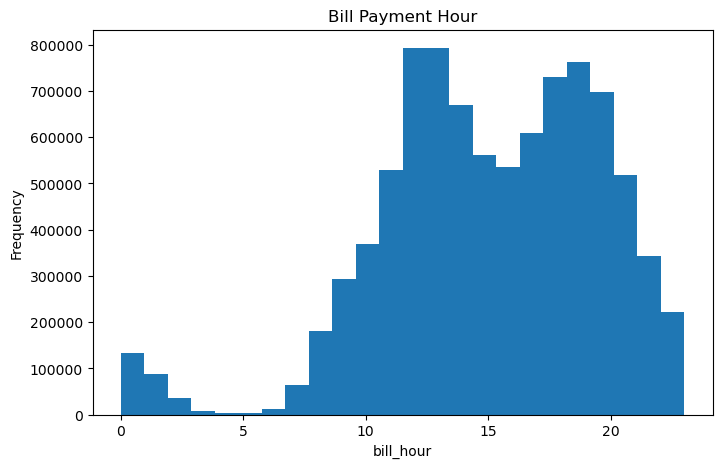

In [ ]:
# Note: The actual data is around 9,000,000 rows, so it will take a bit of time to run

df_sampled = df.sample(n=min(len(df), 100000), random_state=42) # Only use 100,000 samples for speed

plt.figure(figsize=(8, 5)) 

def plot_hist_by_hour(data, column, title=""):
    plt.hist(data[column], bins=24)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

plot_hist_by_hour(df_sampled, 'bill_hour', 'Bill Payment Hour')